# A guided tour to the standard workflow of BESCA (version 2.0)

[Jitao David Zhang](mailto:jitao_david.zhang.com), 13.05.2020

We go through the standard workflow of BESCA (version 2.0) to demonstrate its core functionalities.

BESCA is a python package that builds upon the scanpy package to analyse single-cell data. It uses predefined file formats that are compatibile with the Findable, Accessible, Interoperable, and Reuseable (FAIR) principles of Bioinformatics and Exploratory Data Analysis (BEDA) team. And it offers additional functions for preprocessing, analysis, visualizing, and exporting single-cell sequencng data.

Besides offering data structures and functions, BESCA provides a standard workflow of analysing single-cell RNA-sequencing data that is maintained and supported by the BEDA team. The workflow uses functions implemented in BESCA, scanpy, and other libraries to render a standarized analysis pipeline. The workflow is implemented in a Jupyter notebook and is available in the `workbooks` directory of the BESCA package.

Since BESCA is in rapid development, the latest standard workflow may deviate from the version here. As a reference, we used the commit [a090629](https://github.com/bedapub/besca/commit/a090629509c175b5c15a510cc217f915edceb169).

## Preparation

Copy the script to a directory where the single-cell sequencing data is stored. In this directory, there should be two sub-directories, `raw` and `analyzed`. They contain raw data and analyzed results, respectively.

Next, launch Jupyter notebook or Jupyter lab. Modify the secion `Set the parameters` and other sections if needed. Then run the analysis.

## Import packages

First, we need to import the packages that we will use. They should have been installed during the installation process of BESCA. 

In [1]:
import besca as bc
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from scipy import sparse, io
import os
import time
sc.logging.print_versions()

import logging
import seaborn as sns

# for standard processing, set verbosity to minimum
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)
version = '2.8'
start0 = time.time()

/home/david/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/david/.local/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.4.6 anndata==0.7.1 umap==0.4.2 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.23.0 statsmodels==0.11.1 python-igraph==0.8.2


## Parameter setting

### Data-set-specific parameters

The following parameters need to be set. They determine the global properties of the workflow.

They can be set either on the command line or by modifying the values here.

In [2]:
use_example_dataset=True # If TRUE, the pipeline will run using the example dataset shipped with BESCA

## name of the species to whose genome/transcriptome the sequencing reads are mapped
species = 'human'

## Do we need batch correction? If not, assign 'None' here. If yes, specify a label (column name) in "metadata.tsv", for instance "DONOR".
batch_to_correct = 'None' # must be "None" or any one of the labels in "metadata.tsv", ID, SPECIES, TISSUE, DONOR, TREATMENT; typically "ID" or "DONOR"

## Analysis name, a label of the analysis. You can rename it to a more reasonable name for your analysis.
analysis_name = 'standard_workflow_besca2.0'

## Split condition, ??
split_condition='donor' #'experiment' is generally a good default

## Gene symbols used to plot the dynamic range, provided as a list in Python. A simple logic makes gene symbols all in upper case if the species is human
dynrange=['B2m','Actb','Pgk1','Ctcf'] #genes for which to plot dynamic range
if species=='human': dynrange=[x.upper() for x in dynrange]

## The following lines specify how to deal with labels
labeling_to_use = 'None' # must be "None" or any one of the labels in "metadata.tsv", ID, SPECIES, TISSUE, DONOR, TREATMENT; typically "ID" or "DONOR"
labeling_name = 'MyAnno' # define name under which the labeling should be exported
labeling_description = 'celltype annotation' #define description which should be saved to labeling_info file
labeling_author = 'author' #define author which shoudl be saved to labeling info file

### File input

Here we define the input files. If the script is run in the same directory where the data is stored, the setting needs no change.

In [3]:
# define filepath (this is the folder that contains "raw" and "analyzed")
root_path = os.getcwd()

### Other global parameters that should be kept as stable as possible

The following parameters also affect the global behaviour of the BESCA workflow. In contrast to ones specified in the section `Data-set-specific parameters`, however, they should be kept as stable as possible to allow comparison between studies.

To distinguish them from data-set-specific parameters, these parameters are named with the 'standard_' prefix.

In [4]:
## the standard parameter section

## minimum number of genes in a cell
standard_min_genes = 500

## minimum number of cells in which a gene is detected
standard_min_cells = 30

## minimum counts
standard_min_counts = 1000

## number of genes
standard_n_genes = 4500 # this is the most tricky one to set

## threshold of proportion of mitochondria gene 
standard_percent_mito = 0.1

## maximum counts
standard_max_counts = 100000 #might be redundant with n_genes

## The standard pipeline

Nothing below this point should be modified. In case you wish to add, modify, or remove certain analysis steps, please make a pull request and discuss with the team.

### Reading single-cell sequencing data as AnnData

In [12]:
# define standardized file paths based on the input above
results_folder = os.path.join(root_path, 'analyzed', analysis_name)
results_file = os.path.join(results_folder, analysis_name + '.h5ad') # specify a .h5ad file for storing the results
log_file = os.path.join(results_folder, analysis_name + '.standard.log') # specify a log file for keeping a short summary and overview
sc.settings.figdir = os.path.join(results_folder, 'figures')

#setup standard workflow (generates output directories and setsup logging file)
bc.st.setup(results_folder, 
          analysis_name, 
          labeling_name, 
          labeling_to_use, 
          log_file, 
          version,
          root_path, 
          species, 
          batch_to_correct, 
          standard_min_genes,
          standard_min_cells,
          standard_min_counts,
          standard_n_genes,
          standard_percent_mito,
          standard_max_counts)

if use_example_dataset:
    adata = bc.datasets.pbmc_storage_raw()
else:
    adata = bc.st.read_matrix(root_path)

LOG MESSAGE: Standard Pipeline Version 2.8 used
LOG MESSAGE: Standard Pipeline Version 2.8 used
LOG MESSAGE: 2020-05-14
LOG MESSAGE: 2020-05-14
LOG MESSAGE: Analysis 'standard_workflow_besca2.0' on data located in'/mnt/projects/use-scanpy-and-besca'
LOG MESSAGE: Analysis 'standard_workflow_besca2.0' on data located in'/mnt/projects/use-scanpy-and-besca'
LOG MESSAGE: species: human
LOG MESSAGE: species: human
LOG MESSAGE: Batch effect to correct: None
LOG MESSAGE: Batch effect to correct: None
LOG MESSAGE: Parameters:
LOG MESSAGE: Parameters:
LOG MESSAGE: 	standard_min_genes = 500
LOG MESSAGE: 	standard_min_genes = 500
LOG MESSAGE: 	standard_min_cells = 30
LOG MESSAGE: 	standard_min_cells = 30
LOG MESSAGE: 	standard_min_counts = 1000
LOG MESSAGE: 	standard_min_counts = 1000
LOG MESSAGE: 	standard_n_genes = 4500
LOG MESSAGE: 	standard_n_genes = 4500
LOG MESSAGE: 	standard_max_counts = 100000
LOG MESSAGE: 	standard_max_counts = 100000
LOG MESSAGE: 	standard_percent_mito = 0.1
LOG MESSAGE:

all output directories created successfully


OSError: Unable to open file (unable to open file: name = '/home/david/.local/lib/python3.6/site-packages/besca/datasets/data/pbmc_storage_raw_downsampled.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

We can examine the AnnData object.

In [6]:
print(adata)

AnnData object with n_obs × n_vars = 737280 × 32738 
    obs: 'CELL', 'CONDITION', 'experiment', 'donor'
    var: 'ENSEMBL', 'SYMBOL'


### QC with mitochondria gene proportions

It takes one call to calculate mitochondrial gene content with BESCA.

In [9]:
bc.pp.fraction_counts(adata=adata, species=species)

/home/david/.local/lib/python3.6/site-packages/besca/pp/_fraction_counts.py:62: UserWarning:

Some of the cells contain no counts.                            Do not forget to remove 'empty' cells from data.



## QC and exploratory visualizations

### Count occurrence

We have a look at cell numbers per sample.

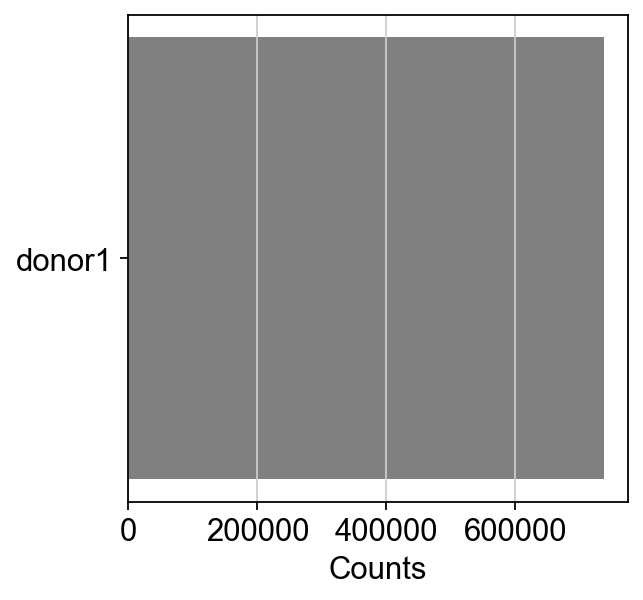

In [10]:
temp=bc.tl.count_occurrence(adata,split_condition)
sns.barplot(y=temp.index,x=temp.Counts,color='gray',orient='h')

#### Transcript Capture Efficiency

This plot gives you an idea about the sequencing depth and if the sequencing has reached saturation or not.

MemoryError: Unable to allocate 89.9 GiB for an array with shape (737280, 32738) and data type float32

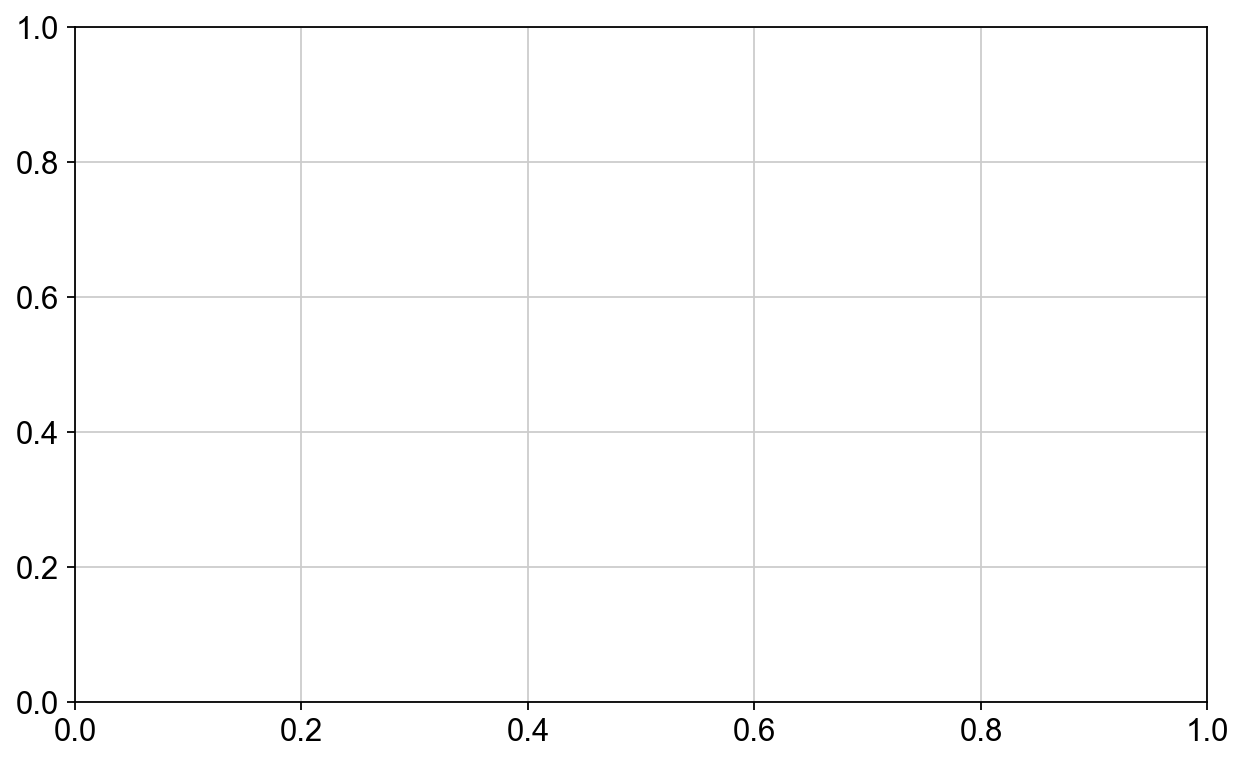

In [11]:
fig, ax = plt.subplots(1)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.tight_layout()

bc.pl.transcript_capture_efficiency(adata,ax=ax)
fig.savefig(os.path.join(results_folder, 'figures/transcriptcaptureefficiency.png'), format='png', bbbox_inches = 'tight') #save figure for QC report

#### Library Size distribution

This plot gives you an idea about the library size distribution in your dataset before processing.

In [13]:
fig = bc.pl.librarysize_overview(adata, bins=100)
fig.savefig(os.path.join(results_folder, 'figures/librarysize.png'), format='png',bbbox_inches = 'tight') #save figure for QC report

MemoryError: Unable to allocate 89.9 GiB for an array with shape (737280, 32738) and data type float32

In [ ]:
adata_unfiltered = adata.copy()

#### Selected Filtering Parameters

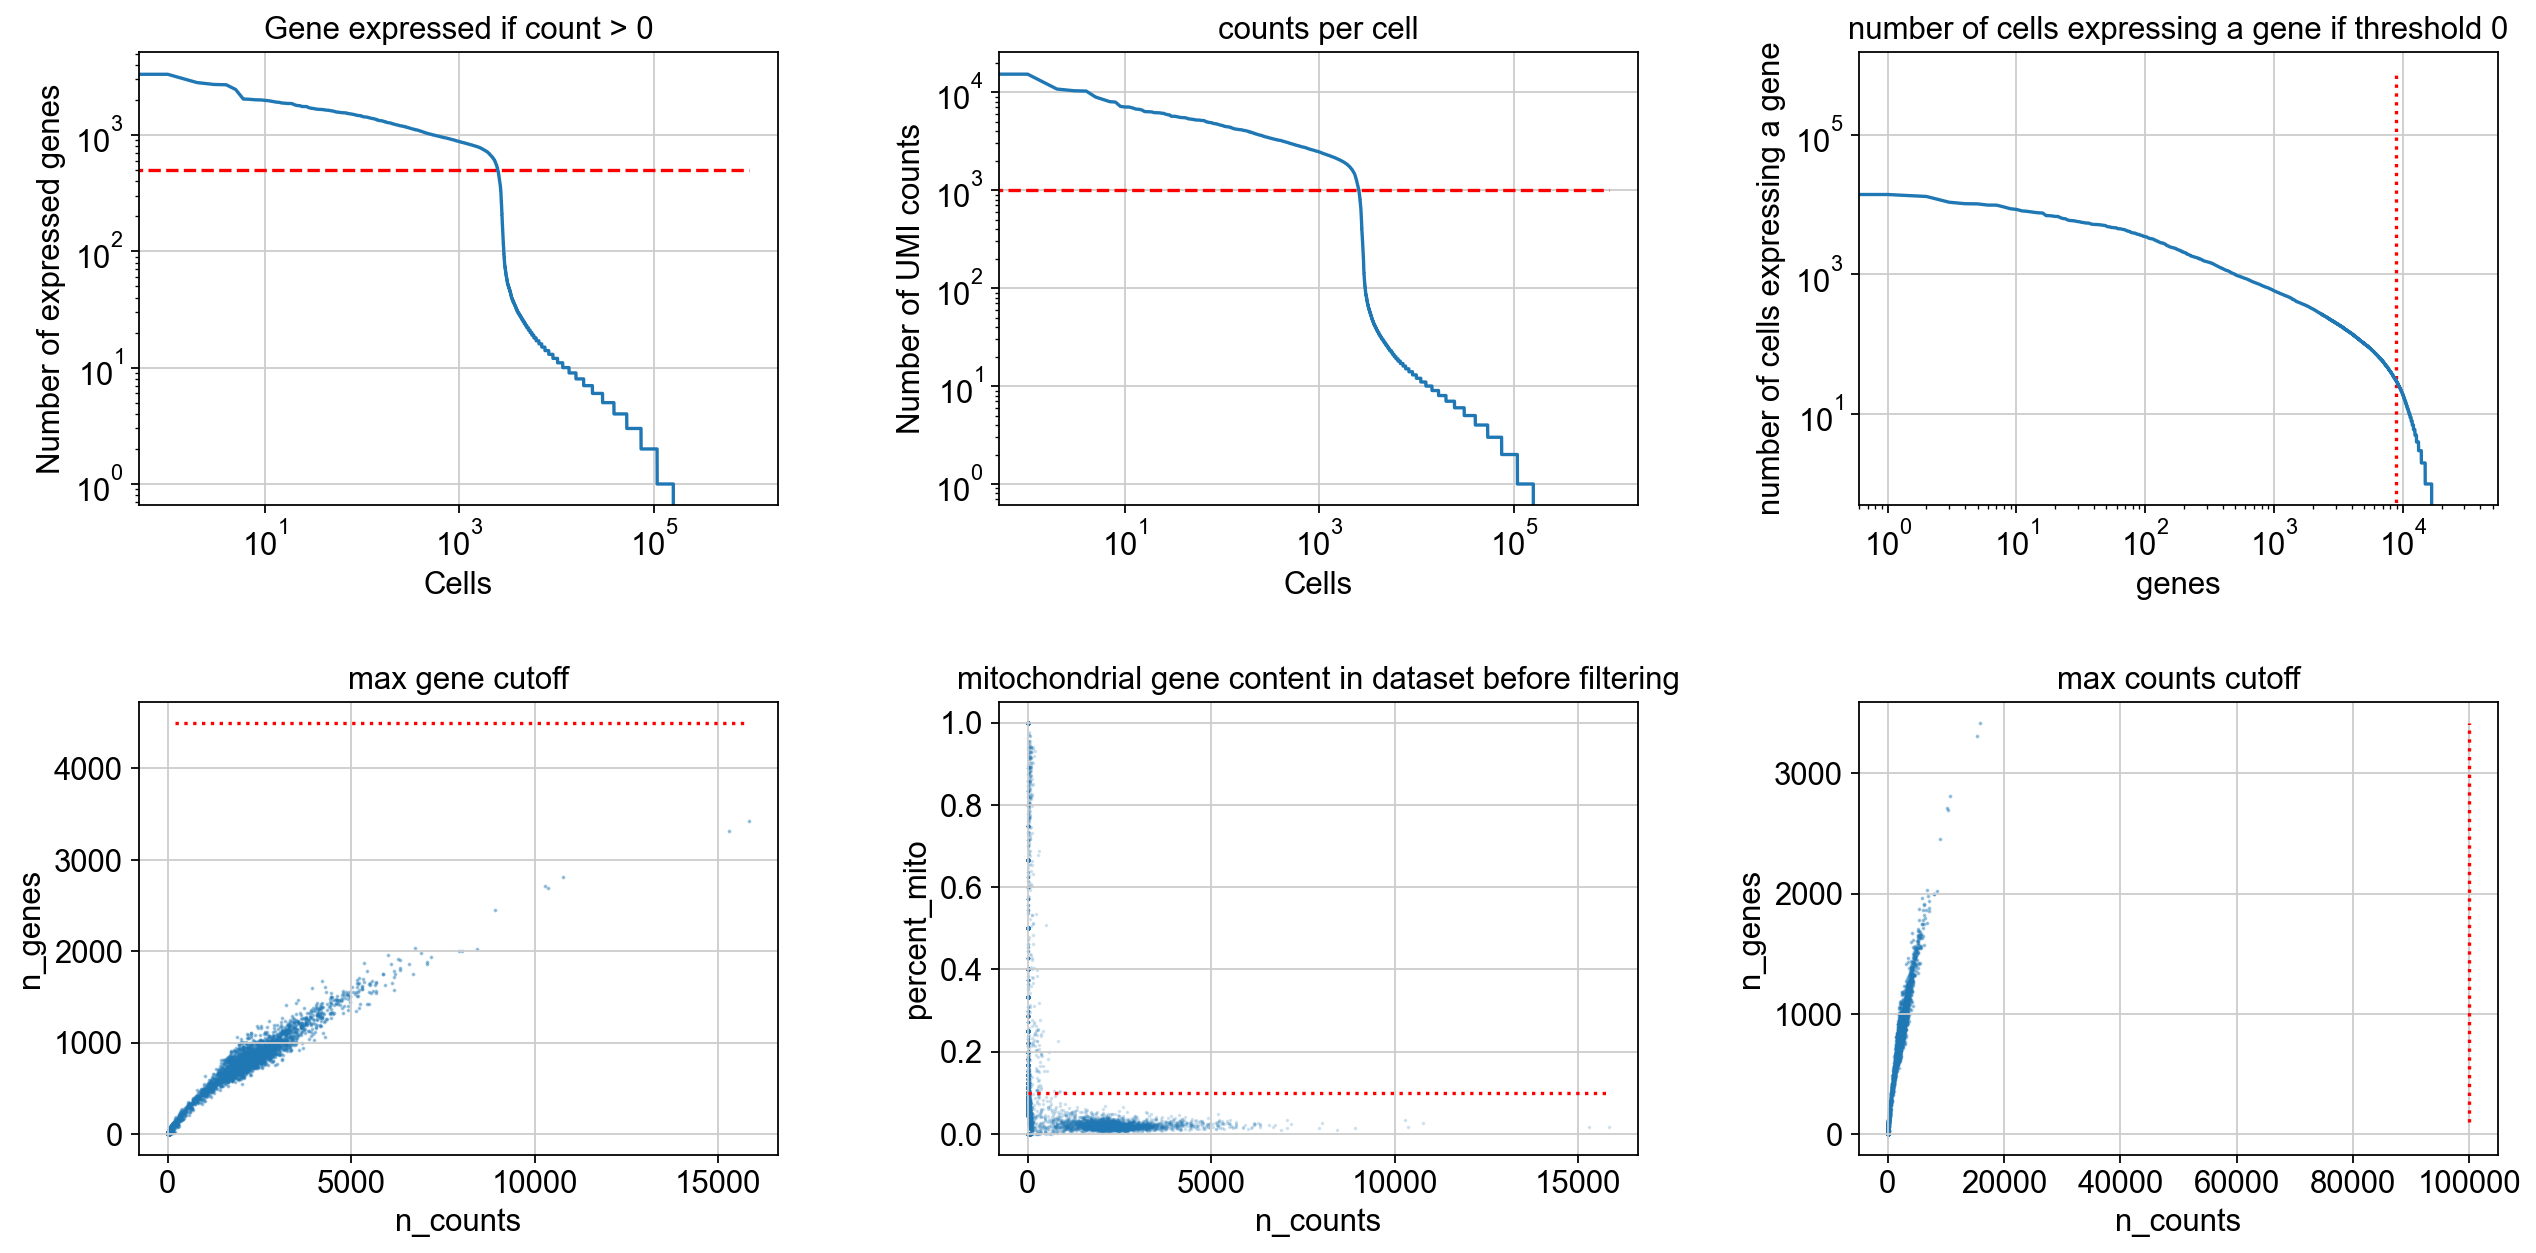

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2)
fig.set_figwidth(17)
fig.set_figheight(9)
fig.tight_layout(pad=4.5)

bc.pl.kp_genes(adata, min_genes=standard_min_genes, ax = ax1)
bc.pl.kp_counts(adata, min_counts=standard_min_counts, ax = ax2)
bc.pl.kp_cells(adata, min_cells=standard_min_cells, ax = ax3)
bc.pl.max_genes(adata, max_genes=standard_n_genes, ax = ax4)
bc.pl.max_mito(adata, max_mito=standard_percent_mito, annotation_type='SYMBOL', species=species, ax = ax5)
bc.pl.max_counts(adata, max_counts=standard_max_counts, ax=ax6)
fig.savefig(os.path.join(results_folder, 'figures/filtering_thresholds.png'), format='png', bbbox_inches = 'tight') #save figure for QC report

#### Scanpy plots of genes, counts, and mitochondria gene counts

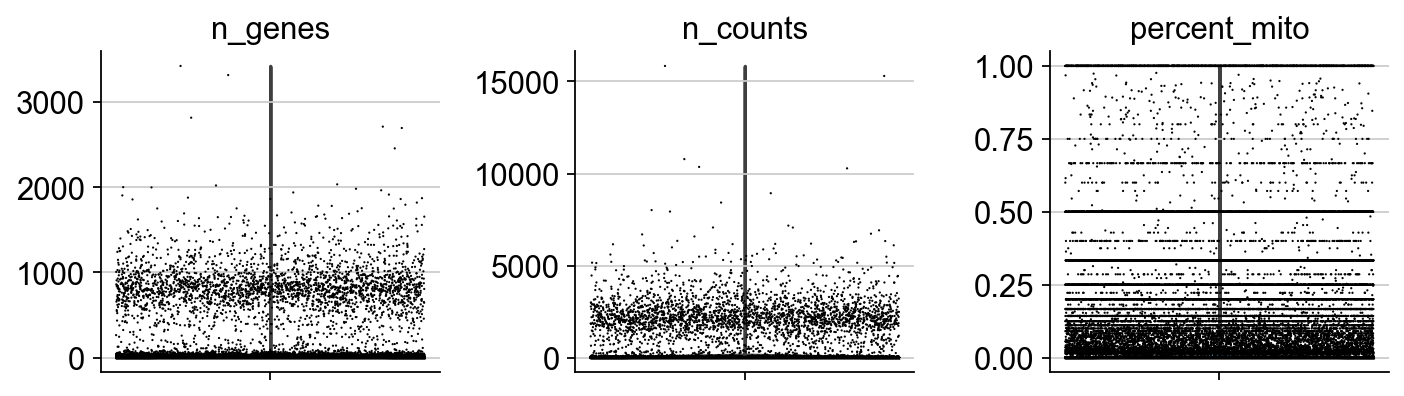

In [16]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.4, multi_panel=True, save = '.before_filtering.png')

#### Mitochondrial genes, genes, and counts by samples grouped by the split condition

In [ ]:
sc.pl.violin(adata, ['percent_mito','n_genes', 'n_counts'], groupby=split_condition,jitter=0.1,rotation=90, save = '.before_filtering.split.png')

### First filtering on gene and cell counts

In [ ]:
%%capture filtering1
adata = bc.st.filtering_cells_genes_min(adata, standard_min_cells, standard_min_genes, standard_min_counts)

In [ ]:
filtering1.show()